In [1]:
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Arxivar el arxiu de dades CSV
archivo_csv = 'Input/TS_Ninja_Radio_v1_CL_5_OCT.csv'
ruta_Output = 'Output/clean_data_CL_5Oct.csv'
ruta_Output1 = 'Output/aggregate_data_CL_5_Oct.csv'

df = pd.read_csv(archivo_csv, sep=';', names=['Time', 'Direction', 'Price', 'Volume'])
print(df.head())


                          Time  Direction  Price  Volume
Datos                     Time  Direction  Price  Volume
NaN    2023-10-05T06:06:31.848       Sell  84.69     1.0
NaN    2023-10-05T06:06:31.848       Sell  84.69     1.0
NaN    2023-10-05T06:06:31.848       Sell  84.69     1.0
NaN    2023-10-05T06:06:58.496        Buy  84.69     1.0


In [2]:
df = df.reset_index(drop=True)
df = df.drop(0)
df.head()

,Time,Direction,Price,Volume
1,2023-10-05T06:06:31.848,Sell,84.69,1.0
2,2023-10-05T06:06:31.848,Sell,84.69,1.0
3,2023-10-05T06:06:31.848,Sell,84.69,1.0
4,2023-10-05T06:06:58.496,Buy,84.69,1.0
5,2023-10-05T06:06:58.496,Buy,84.7,1.0


In [3]:
df_seconds = df.copy()

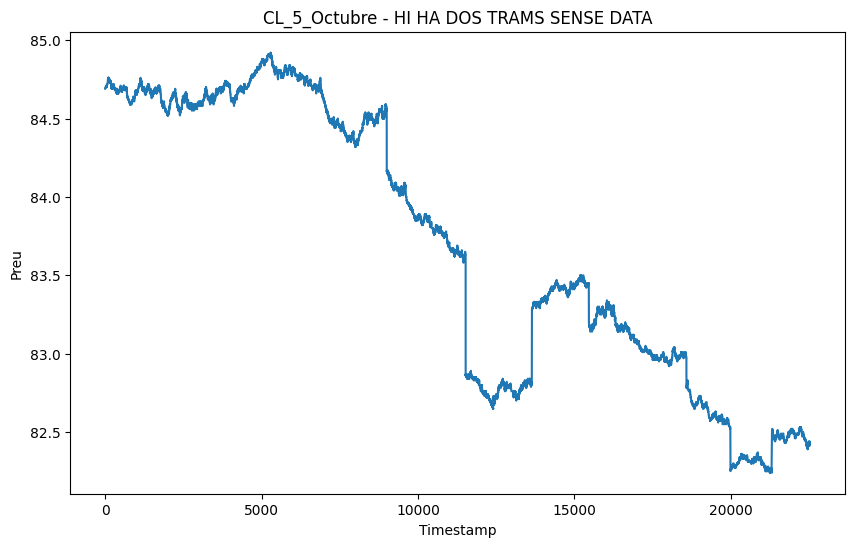

In [7]:
df['Price'] = pd.to_numeric(df['Price'])

# Crea un Gràfic de la serie 'Price'
plt.figure(figsize=(10, 6))
plt.plot(df['Price'])
plt.title('CL_5_Octubre - HI HA DOS TRAMS SENSE DATA')
plt.xlabel('Timestamp')
plt.ylabel('Preu')
plt.show()

In [8]:
df = df.sort_values(by='Time')

# # Tasa de canvi temporal, temps files

In [9]:
#TASA DE CANVI TEMPORAL, DIFERENCIA DE TEMPS ENTRE FILES CONSECUTIVES
df['Time'] = pd.to_datetime(df['Time'])
df['Time_Difference'] = df['Time'].diff()
df['Row_Speed'] = df['Time_Difference'] / df['Time_Difference'].shift()

In [10]:

# Format columna Time_Diference
df['Time_Difference'] = df['Time_Difference'].fillna(pd.Timedelta(seconds=0))  # RNaN a 0 segundos
df['Time_Difference'] = df['Time_Difference'].apply(lambda x: f"{int(x.total_seconds())} seconds {int(x.microseconds / 1000)} milliseconds")

In [11]:
df.head(40)

,Time,Direction,Price,Volume,Time_Difference,Row_Speed
1,2023-10-05 06:06:31.848,Sell,84.69,1.0,0 seconds 0 milliseconds,NaN
2,2023-10-05 06:06:31.848,Sell,84.69,1.0,0 seconds 0 milliseconds,NaN
3,2023-10-05 06:06:31.848,Sell,84.69,1.0,0 seconds 0 milliseconds,NaN
4,2023-10-05 06:06:58.496,Buy,84.69,1.0,26 seconds 648 milliseconds,inf
5,2023-10-05 06:06:58.496,Buy,84.70,1.0,0 seconds 0 milliseconds,0.000000
6,2023-10-05 06:06:58.496,Buy,84.70,1.0,0 seconds 0 milliseconds,NaN
7,2023-10-05 06:06:58.500,Buy,84.70,1.0,0 seconds 4 milliseconds,inf
8,2023-10-05 06:06:58.504,Buy,84.70,1.0,0 seconds 4 milliseconds,1.000000
9,2023-10-05 06:06:58.520,Sell,84.70,1.0,0 seconds 16 milliseconds,4.000000
10,2023-10-05 06:07:01.856,Buy,84.70,1.0,3 seconds 336 milliseconds,208.500000


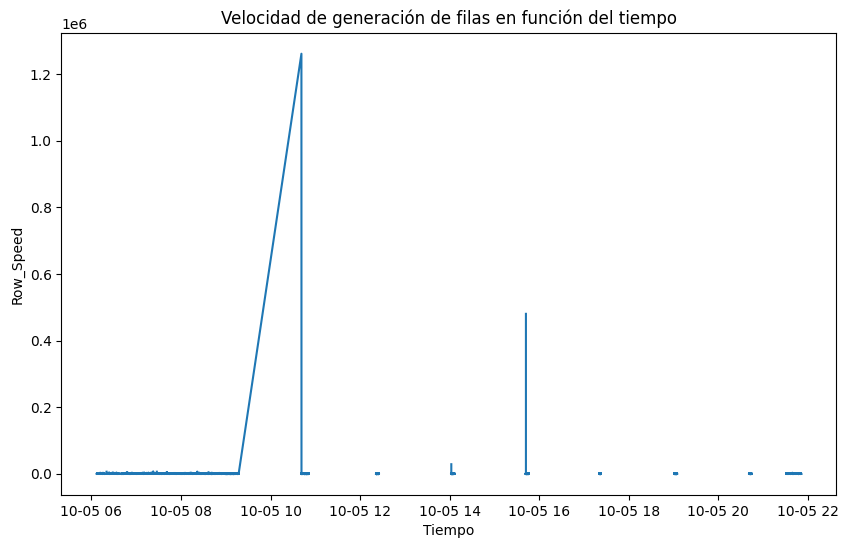

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['Time'], df['Row_Speed'])
plt.title('Velocidad de generación de filas en función del tiempo')
plt.xlabel('Tiempo')
plt.ylabel('Row_Speed')
plt.show()


# Velocitat en funcióde files per segon (sense tenir en compte el volum)


In [34]:
df_seconds['Volume'] = pd.to_numeric(df_seconds['Volume'], errors='coerce')
df_seconds.head(10)

,Time,Direction,Price,Volume
1,2023-10-05T06:06:31.848,Sell,84.69,1.0
2,2023-10-05T06:06:31.848,Sell,84.69,1.0
3,2023-10-05T06:06:31.848,Sell,84.69,1.0
4,2023-10-05T06:06:58.496,Buy,84.69,1.0
5,2023-10-05T06:06:58.496,Buy,84.7,1.0
6,2023-10-05T06:06:58.496,Buy,84.7,1.0
7,2023-10-05T06:06:58.5,Buy,84.7,1.0
8,2023-10-05T06:06:58.504,Buy,84.7,1.0
9,2023-10-05T06:06:58.52,Sell,84.7,1.0
10,2023-10-05T06:07:01.856,Buy,84.7,1.0


In [35]:
#creació df amb la informació agregada
df_aggregate = pd.DataFrame(columns=['Start_Time', 'End_Time', 'Num_Rows', 'Final_Price', 'Price_Diff', 'Cumulative_Volume', 'impulso'])

# Establim el periode per agregar
interval = pd.Timedelta(seconds=1)

# Inicialització variables
start_time = df['Time'].iloc[0]
end_time = start_time + interval
cumulative_volume = 0
num_rows = 0  # contador per al nombre de files

# Recorrer el df 
for index, row in df.iterrows():
    if row['Time'] >= end_time:
        # Conversió de data
        price1 = float(df['Price'].iloc[index - 1])
        price2 = float(df['Price'].iloc[index - 2])
        
        # Calcular la diferencia de preu entre Start_Time i End_Time
        price_diff = price1 - price2

        # Agregar los resultados al DataFrame df_aggregate
        df_aggregate = df_aggregate.append({
            'Start_Time': start_time,
            'End_Time': end_time,
            'Num_Rows': num_rows,  
            'Final_Price': price1,  # Preu al final del periode
            'Price_Diff': price_diff,
            'Cumulative_Volume': cumulative_volume
        }, ignore_index=True)
        
        # Restablir contadors
        cumulative_volume = 0
        num_rows = 0
        start_time = row['Time']
        end_time = start_time + interval
    else:
        num_rows += 1  # Incrementar el contador para 'Num_Rows'
        # Conversió de data
        cumulative_volume += pd.to_numeric(row['Volume'], errors='coerce')

# Estudiem el moviment del preu cada n períodes
df_aggregate['impulso'] = df_aggregate['Final_Price'].diff(periods=5)

df_aggregate['ratio'] = df_aggregate['Num_Rows'] / df_aggregate['impulso'].where(df_aggregate['impulso'] != 0, other=1)
df_aggregate['ratio'] = df_aggregate['ratio'].abs()
print('AGREGACIONS DEL PREU PER NOMBRE DE FILES, DIFERENCIA PREU, Y VOLUM')
df_aggregate.head(50)


AGREGACIONS DEL PREU PER NOMBRE DE FILES, DIFERENCIA PREU, Y VOLUM


,Start_Time,End_Time,Num_Rows,Final_Price,Price_Diff,Cumulative_Volume,impulso,ratio
0,2023-10-05 06:06:31.848,2023-10-05 06:06:32.848,3,84.69,0.00,3.0,NaN,NaN
1,2023-10-05 06:06:58.496,2023-10-05 06:06:59.496,5,84.70,0.00,5.0,NaN,NaN
2,2023-10-05 06:07:01.856,2023-10-05 06:07:02.856,0,84.70,0.00,0.0,NaN,NaN
3,2023-10-05 06:07:13.124,2023-10-05 06:07:14.124,0,84.70,0.00,0.0,NaN,NaN
4,2023-10-05 06:07:20.284,2023-10-05 06:07:21.284,10,84.71,0.01,10.0,NaN,NaN
5,2023-10-05 06:07:30.348,2023-10-05 06:07:31.348,1,84.71,0.00,1.0,0.02,50.0
6,2023-10-05 06:07:32.208,2023-10-05 06:07:33.208,0,84.71,0.00,0.0,0.01,0.0
7,2023-10-05 06:07:34.208,2023-10-05 06:07:35.208,0,84.71,0.00,0.0,0.01,0.0
8,2023-10-05 06:07:44.360,2023-10-05 06:07:45.360,2,84.71,0.00,2.0,0.01,200.0
9,2023-10-05 06:07:46.764,2023-10-05 06:07:47.764,1,84.71,0.00,1.0,0.00,1.0


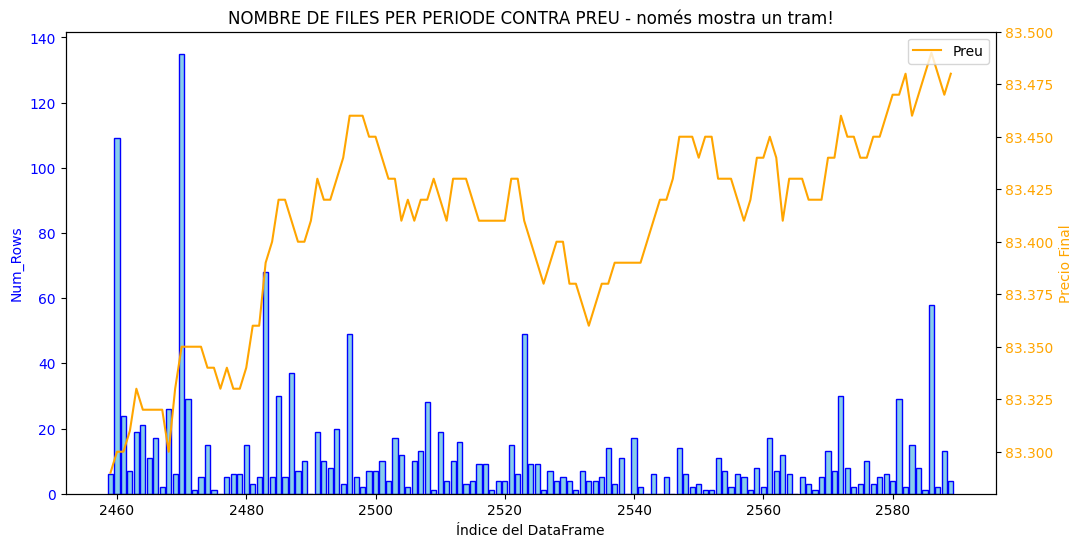

In [36]:

# Limitar el DataFrame 
df_aggregate_600 = df_aggregate.iloc[2459:2590]


fig, ax1 = plt.subplots(figsize=(12, 6))

# Crear un gráfico de barres
ax1.bar(df_aggregate_600.index, df_aggregate_600['Num_Rows'], color='skyblue', edgecolor='blue')
ax1.set_xlabel('Índice del DataFrame')
ax1.set_ylabel('Num_Rows', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_title('NOMBRE DE FILES PER PERIODE CONTRA PREU - només mostra un tram!')

# Crear un segon eix
ax2 = ax1.twinx()
ax2.plot(df_aggregate_600.index, df_aggregate_600['Final_Price'], color='orange', label='Preu')
ax2.set_ylabel('Precio Final', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

ax2.legend(loc='upper right')


# Mostrar el gráfico
plt.show()

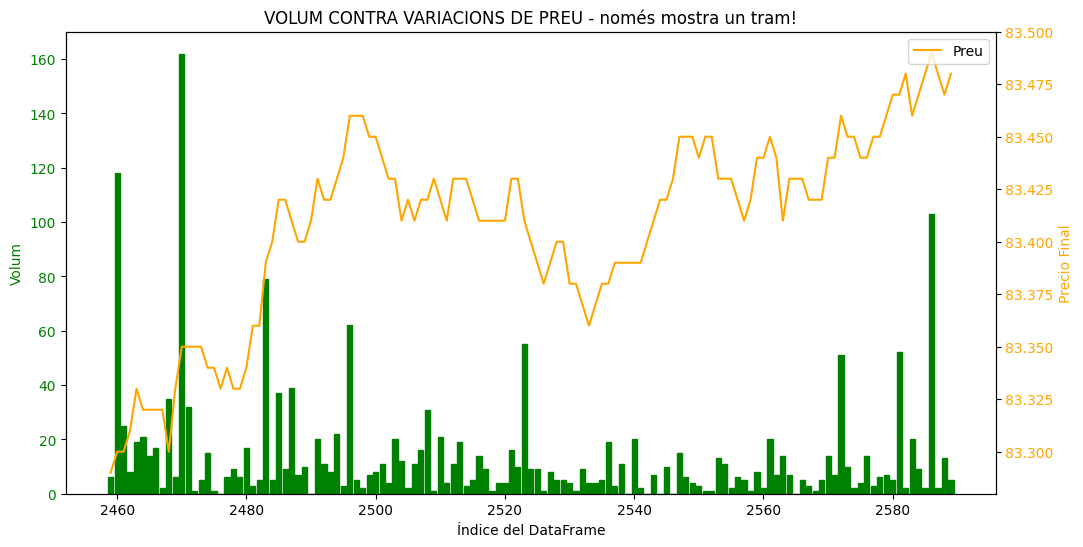

In [37]:

# Limitar el DataFrame 
df_aggregate_600 = df_aggregate.iloc[2459:2590]


fig, ax1 = plt.subplots(figsize=(12, 6))

# Crear un gráfico de barres
ax1.bar(df_aggregate_600.index, df_aggregate_600['Cumulative_Volume'], color='green', edgecolor='green')
ax1.set_xlabel('Índice del DataFrame')
ax1.set_ylabel('Volum', color='green')
ax1.tick_params(axis='y', labelcolor='green')
ax1.set_title('VOLUM CONTRA VARIACIONS DE PREU - només mostra un tram!')

# Crear un segon eix
ax2 = ax1.twinx()
ax2.plot(df_aggregate_600.index, df_aggregate_600['Final_Price'], color='orange', label='Preu')
ax2.set_ylabel('Precio Final', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

ax2.legend(loc='upper right')


# Mostrar el gráfico
plt.show()

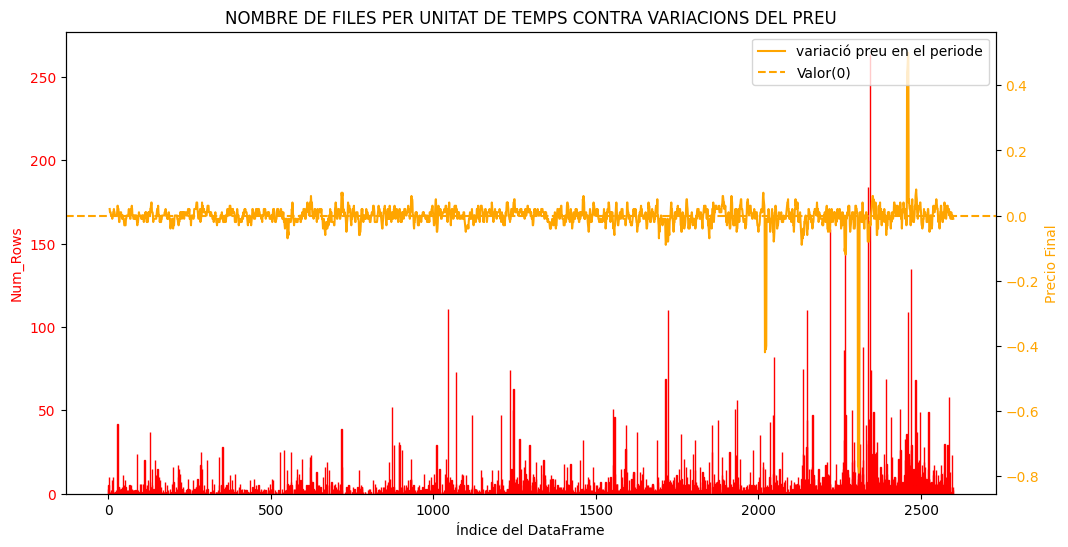

In [38]:
# Limitar el DataFrame a los primeros 600 elementos del índice
df_aggregate_600 = df_aggregate.iloc[:2600]

# Crear una figura y ejes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Crear un gráfico de barras en el eje principal (eje Y izquierdo) para 'Num_Rows'
ax1.bar(df_aggregate_600.index, df_aggregate_600['Num_Rows'], color='skyblue', edgecolor='red')
ax1.set_xlabel('Índice del DataFrame')
ax1.set_ylabel('Num_Rows', color='red')
ax1.tick_params(axis='y', labelcolor='red')
ax1.set_title('NOMBRE DE FILES PER UNITAT DE TEMPS CONTRA VARIACIONS DEL PREU')

# Crear un segundo eje Y para los precios
ax2 = ax1.twinx()
ax2.plot(df_aggregate_600.index, df_aggregate_600['impulso'], color='orange', label='variació preu en el periode')
ax2.set_ylabel('Precio Final', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# valor 0
horizontal_line_value = 0  
ax2.axhline(y=horizontal_line_value, color='orange', linestyle='--', label=f'Valor({horizontal_line_value})')
ax2.legend(loc='upper right')

ax2.legend(loc='upper right')

plt.show()

Text(0.5, 1.0, 'Gráfico de Línea de la Columna "Ratio"')

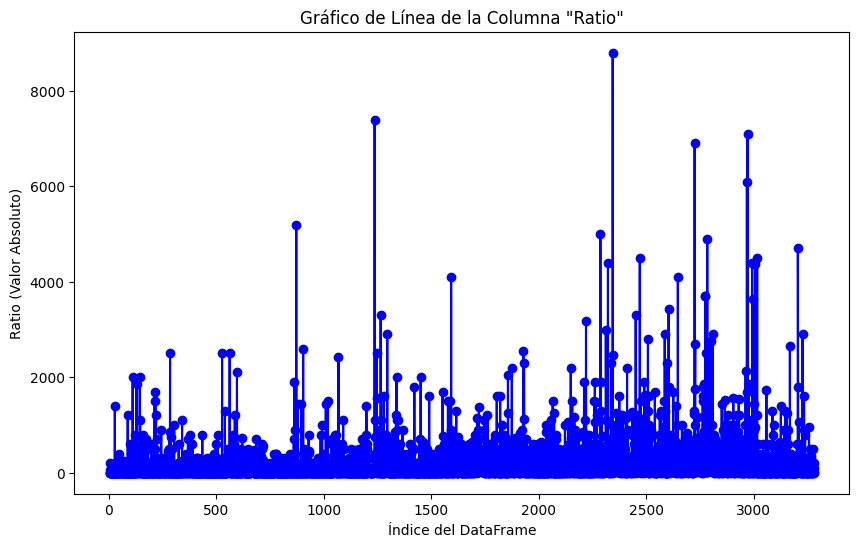

In [39]:
plt.figure(figsize=(10, 6))  # Ajusta el tamaño de la figura según tus preferencias
plt.plot(df_aggregate.index, df_aggregate['ratio'], color='blue', marker='o', linestyle='-')
plt.xlabel('Índice del DataFrame')
plt.ylabel('Ratio (Valor Absoluto)')
plt.title('Gráfico de Línea de la Columna "Ratio"')



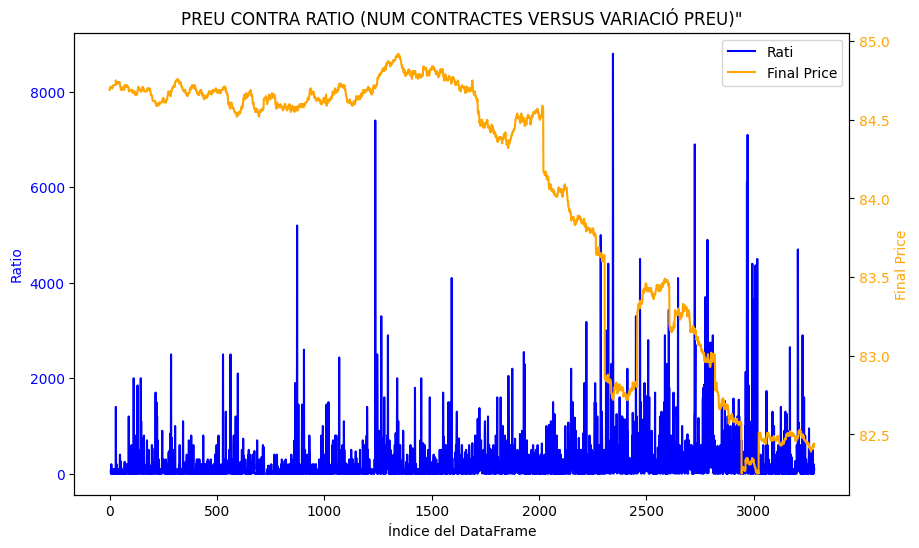

In [40]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.plot(df_aggregate.index, df_aggregate['ratio'], color='blue', linestyle='-', label='Rati')
ax1.set_xlabel('Índice del DataFrame')
ax1.set_ylabel('Ratio', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')


# Crear un segón eix
ax2 = ax1.twinx()
ax2.plot(df_aggregate.index, df_aggregate['Final_Price'], color='orange', linestyle='-', label='Final Price')
ax2.set_ylabel('Final Price', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Llegendes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines = lines_1 + lines_2
labels = labels_1 + labels_2
ax1.legend(lines, labels, loc='upper right')

plt.title('PREU CONTRA RATIO (NUM CONTRACTES VERSUS VARIACIÓ PREU)"')
plt.show()


In [ ]:
# Crea un CSV i el gurada al directori Output
df.to_csv(ruta_Output, index=False)
df_aggregate.to_csv(ruta_Output1, index=False)